In [2]:
import pandas as pd
import numpy as np
import os
import string
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
emissions = pd.read_excel('../../data/tidy/Emissions-Reduction-Calculation.xlsx')
emissions

,Sector,Subsector,Year,Total Emissions (MMTCO2e),CO2 Emissions (MMTCO2e),CH4 Emissions (MMTCO2e),N2O Emissions (MMTCO2e),VMT (billion miles),Total emissions factors in eGrid (Ib/MWh)
0,Mobile Combustion,Automobile,2021.0,1.028899,1.022483,0.000561,0.005855,2.81,NaN
1,Mobile Combustion,Motorcycle,2021.0,0.036643,0.036643,0.000000,0.000000,0.21,NaN
2,Mobile Combustion,Trucks,2021.0,1.789613,1.788362,0.000097,0.001154,3.87,NaN
3,Mobile Combustion,Buses,2021.0,0.020234,0.020193,0.000003,0.000038,0.03,NaN
4,Electricity Consumption,Residential Electricity,2021.0,0.612048,0.607004,0.002026,0.003018,NaN,543.852
5,Electricity Consumption,Commercial&Industrial Electricity,2021.0,0.702893,0.6971,0.002326,0.003466,NaN,NaN
6,Solid Waste Landfills,Landfill fuel combustion,2021.0,0.000000,NaN,NaN,NaN,NaN,NaN
7,Solid Waste Landfills,Landfill methane,2021.0,0.000000,NaN,NaN,NaN,NaN,NaN
8,Stationary Combustion,Residential fuel oil,2020.0,0.760000,NaN,NaN,NaN,NaN,NaN
9,Stationary Combustion,Residential natural gas,2020.0,0.540000,NaN,NaN,NaN,NaN,NaN


In [35]:
# Remove rows starting from index 20
emissions = emissions.iloc[:20]

# Keep only the first four columns
emissions = emissions.iloc[:, :4]
emissions

,Sector,Subsector,Year,Total Emissions (MMTCO2e)
0,Mobile Combustion,Automobile,2021.0,1.028899
1,Mobile Combustion,Motorcycle,2021.0,0.036643
2,Mobile Combustion,Trucks,2021.0,1.789613
3,Mobile Combustion,Buses,2021.0,0.020234
4,Electricity Consumption,Residential Electricity,2021.0,0.612048
5,Electricity Consumption,Commercial&Industrial Electricity,2021.0,0.702893
6,Solid Waste Landfills,Landfill fuel combustion,2021.0,0.000000
7,Solid Waste Landfills,Landfill methane,2021.0,0.000000
8,Stationary Combustion,Residential fuel oil,2020.0,0.760000
9,Stationary Combustion,Residential natural gas,2020.0,0.540000


In [36]:


# Define number of sampled reduction rates
num_samples = 100

# Sample reduction rates from a uniform distribution (between 5% and 95%)
reduction_rates = np.random.uniform(0.05, 0.95, num_samples)

# Sort them for better readability (optional)
reduction_rates = np.sort(reduction_rates)

# Apply reductions
for rate in reduction_rates:
    emissions[f"Reduction {int(rate*100)}%"] = emissions["Total Emissions (MMTCO2e)"].apply(
        lambda x: x * (1 - rate) if x > 0 else x * (1 + rate)  # Adjust negative values
    )

# Display results
emissions


,Sector,Subsector,Year,Total Emissions (MMTCO2e),Reduction 6%,Reduction 7%,Reduction 8%,Reduction 10%,Reduction 16%,Reduction 17%,...,Reduction 83%,Reduction 84%,Reduction 85%,Reduction 86%,Reduction 88%,Reduction 89%,Reduction 90%,Reduction 91%,Reduction 93%,Reduction 94%
0,Mobile Combustion,Automobile,2021.0,1.028899,0.959145,0.946862,0.938215,0.918942,0.860402,0.848698,...,0.165222,0.161611,0.146813,0.135545,0.122743,0.108487,0.101435,0.084338,0.069028,0.052041
1,Mobile Combustion,Motorcycle,2021.0,0.036643,0.034159,0.033721,0.033414,0.032727,0.030642,0.030225,...,0.005884,0.005756,0.005229,0.004827,0.004371,0.003864,0.003612,0.003004,0.002458,0.001853
2,Mobile Combustion,Trucks,2021.0,1.789613,1.668286,1.646921,1.631881,1.598359,1.496538,1.476180,...,0.287379,0.281098,0.255358,0.235760,0.213492,0.188696,0.176430,0.146693,0.120064,0.090517
3,Mobile Combustion,Buses,2021.0,0.020234,0.018862,0.018621,0.018451,0.018072,0.016921,0.016690,...,0.003249,0.003178,0.002887,0.002666,0.002414,0.002133,0.001995,0.001659,0.001358,0.001023
4,Electricity Consumption,Residential Electricity,2021.0,0.612048,0.570554,0.563247,0.558104,0.546639,0.511816,0.504854,...,0.098284,0.096135,0.087333,0.080630,0.073014,0.064534,0.060339,0.050169,0.041062,0.030957
5,Electricity Consumption,Commercial&Industrial Electricity,2021.0,0.702893,0.655240,0.646849,0.640942,0.627775,0.587784,0.579788,...,0.112872,0.110405,0.100295,0.092597,0.083852,0.074113,0.069295,0.057616,0.047157,0.035552
6,Solid Waste Landfills,Landfill fuel combustion,2021.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Solid Waste Landfills,Landfill methane,2021.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Stationary Combustion,Residential fuel oil,2020.0,0.760000,0.708476,0.699403,0.693016,0.678780,0.635539,0.626893,...,0.122042,0.119375,0.108444,0.100121,0.090664,0.080134,0.074925,0.062297,0.050988,0.038440
9,Stationary Combustion,Residential natural gas,2020.0,0.540000,0.503391,0.496944,0.492406,0.482291,0.451567,0.445424,...,0.086714,0.084819,0.077052,0.071138,0.064419,0.056937,0.053236,0.044263,0.036228,0.027313


In [37]:
# Transform the DataFrame
melted_df = emissions.melt(
    id_vars=["Sector", "Subsector"],
    value_vars=["Total Emissions (MMTCO2e)"] + [f"Reduction {int(rate*100)}%" for rate in reduction_rates],
    var_name="Reduction Level",
    value_name="Emissions (MMTCO2e)"
)

# Create a new column combining Sector, Subsector, and Reduction Level
melted_df["Sector - Reduction Level"] = (
    melted_df["Sector"] + " - " + melted_df["Subsector"] + " - " + melted_df["Reduction Level"]
)

# Select final columns
final_df = melted_df[["Sector - Reduction Level", "Emissions (MMTCO2e)"]]
final_df


,Sector - Reduction Level,Emissions (MMTCO2e)
0,Mobile Combustion - Automobile - Total Emissio...,1.028899
1,Mobile Combustion - Motorcycle - Total Emissio...,0.036643
2,Mobile Combustion - Trucks - Total Emissions (...,1.789613
3,Mobile Combustion - Buses - Total Emissions (M...,0.020234
4,Electricity Consumption - Residential Electric...,0.612048
...,...,...
1235,Agriculture & Land management - Manure fertili...,0.000004
1236,Wastewater treatment - Wastewater - Reduction 94%,0.004697
1237,Forestry - Deciduous forest - Reduction 94%,-1.066578
1238,Forestry - Coniferous forest - Reduction 94%,-0.083892


In [38]:
final_df.to_csv('emissions_transformed.csv', index=False)

In [39]:
final_df = final_df[final_df["Emissions (MMTCO2e)"] != 0]
final_df

,Sector - Reduction Level,Emissions (MMTCO2e)
0,Mobile Combustion - Automobile - Total Emissio...,1.028899
1,Mobile Combustion - Motorcycle - Total Emissio...,0.036643
2,Mobile Combustion - Trucks - Total Emissions (...,1.789613
3,Mobile Combustion - Buses - Total Emissions (M...,0.020234
4,Electricity Consumption - Residential Electric...,0.612048
...,...,...
1235,Agriculture & Land management - Manure fertili...,0.000004
1236,Wastewater treatment - Wastewater - Reduction 94%,0.004697
1237,Forestry - Deciduous forest - Reduction 94%,-1.066578
1238,Forestry - Coniferous forest - Reduction 94%,-0.083892


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_

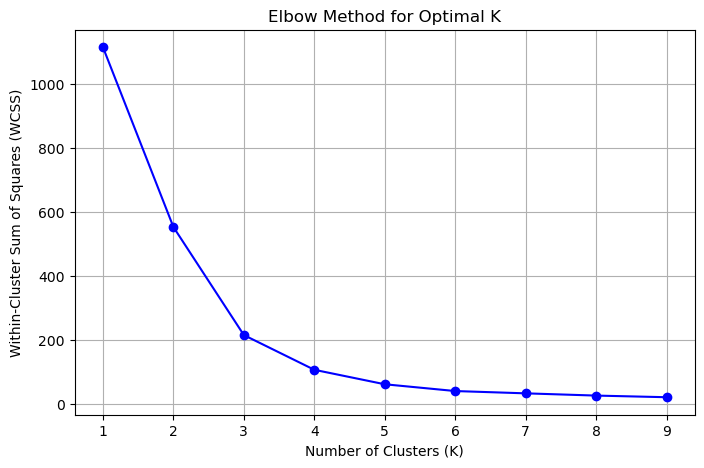

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardize the emissions data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(final_df[["Emissions (MMTCO2e)"]])

# Compute WCSS for different K values
wcss = []
K_range = range(1, 10)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to cluster centers

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid()
plt.show()


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_

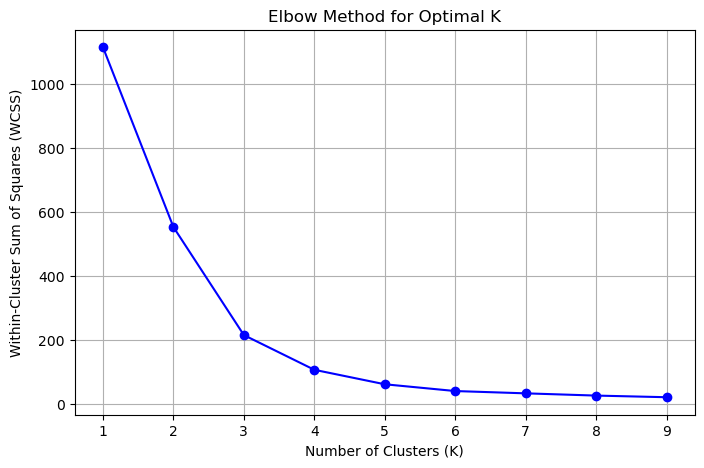

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage



# Extract relevant features for clustering
X = final_df[["Emissions (MMTCO2e)"]].copy()

# Standardize the emissions data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute WCSS for different K values
wcss = []
K_range = range(1, 10)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is the sum of squared distances to cluster centers

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.title("Elbow Method for Optimal K")
plt.xticks(K_range)
plt.grid()
plt.show()



C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_

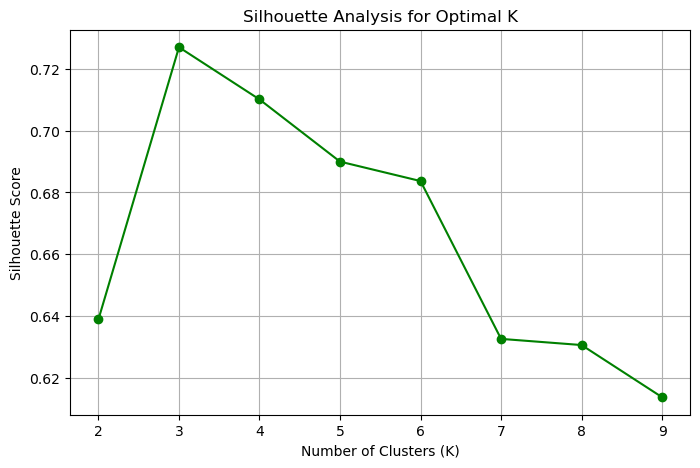

In [42]:
from sklearn.metrics import silhouette_score

# Test different K values (from 2 to 10)
K_range = range(2, 10)  # Start from 2 because silhouette score isn't defined for K=1
silhouette_scores = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker="o", linestyle="-", color="g")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal K")
plt.xticks(K_range)
plt.grid()
plt.show()


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\Temp\ipykernel_11396\2005594712.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["Cluster"] = kmeans.fit_predict(X_scaled)


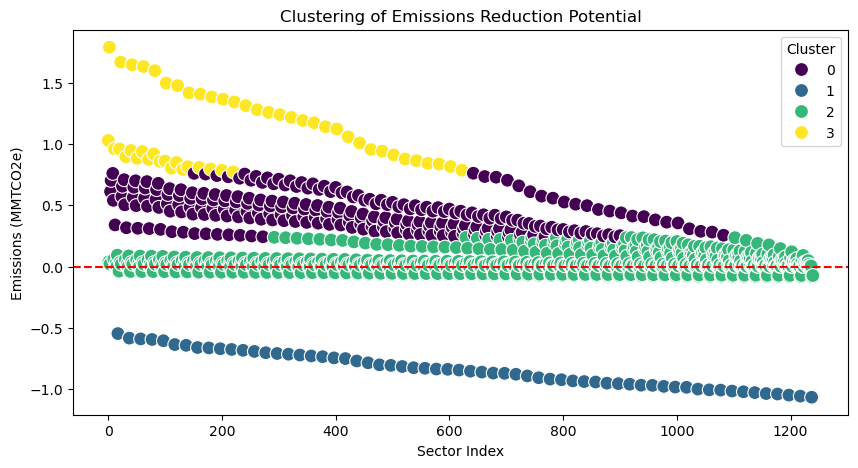

                             Sector - Reduction Level  Emissions (MMTCO2e)  \
0   Mobile Combustion - Automobile - Total Emissio...             1.028899   
1   Mobile Combustion - Motorcycle - Total Emissio...             0.036643   
2   Mobile Combustion - Trucks - Total Emissions (...             1.789613   
3   Mobile Combustion - Buses - Total Emissions (M...             0.020234   
4   Electricity Consumption - Residential Electric...             0.612048   
5   Electricity Consumption - Commercial&Industria...             0.702893   
8   Stationary Combustion - Residential fuel oil -...             0.760000   
9   Stationary Combustion - Residential natural ga...             0.540000   
10  Stationary Combustion - Residential propane - ...             0.060000   
11  Stationary Combustion - Commercial fuel - Tota...             0.960000   
12  Stationary Combustion - Industrial fuel - Tota...             0.339402   
13  Agriculture & Land management - Organic fertil...           

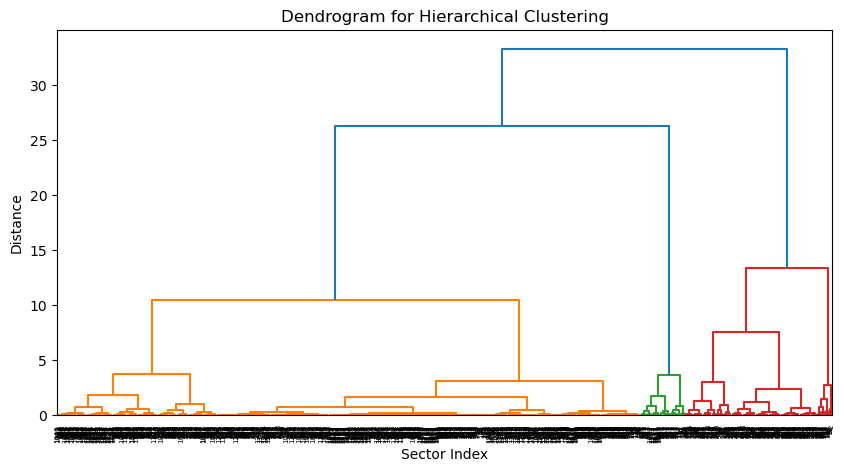

In [43]:
# Apply K-Means Clustering (Choosing 3 clusters for simplicity)
k = 4  # Adjust this based on the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
final_df["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualization: Scatter plot of emissions with clusters
plt.figure(figsize=(10, 5))
sns.scatterplot(data=final_df, x=final_df.index, y="Emissions (MMTCO2e)", hue="Cluster", palette="viridis", s=100)
plt.axhline(0, color="red", linestyle="--")  # Mark zero emissions line
plt.title("Clustering of Emissions Reduction Potential")
plt.xlabel("Sector Index")
plt.ylabel("Emissions (MMTCO2e)")
plt.legend(title="Cluster")
plt.show()

# Print the cluster assignment for each sector
print(final_df[["Sector - Reduction Level", "Emissions (MMTCO2e)", "Cluster"]].head(20))

# Optional: Hierarchical Clustering (Dendrogram)
plt.figure(figsize=(10, 5))
linked = linkage(X_scaled, method='ward')
dendrogram(linked, labels=final_df.index, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sector Index")
plt.ylabel("Distance")
plt.show()


C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_

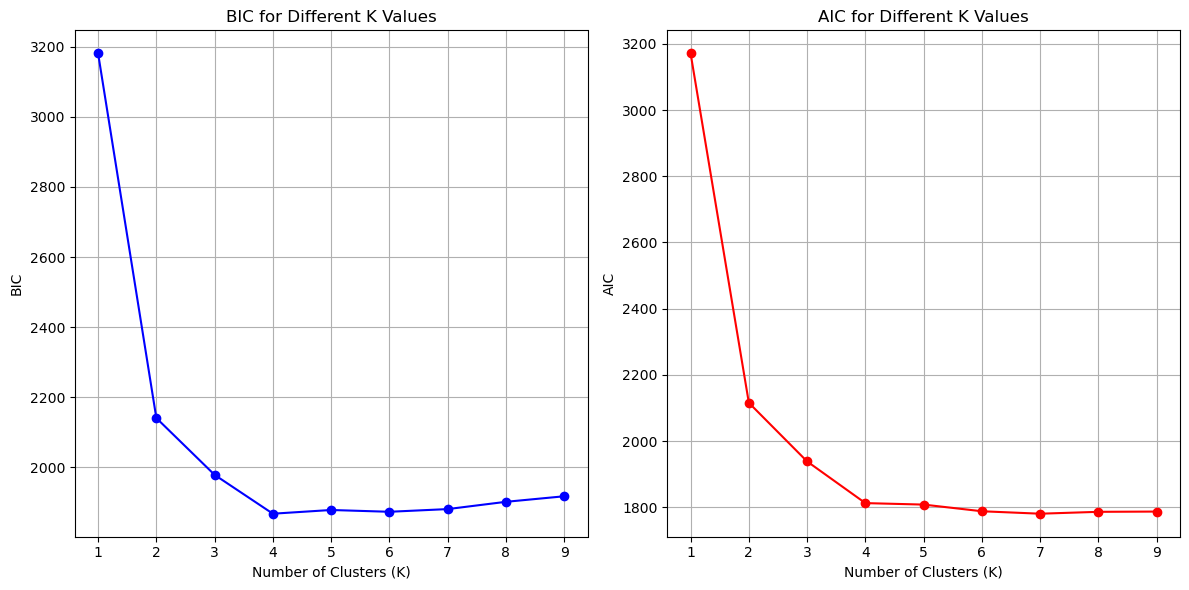

C:\Users\peiyaozhao\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


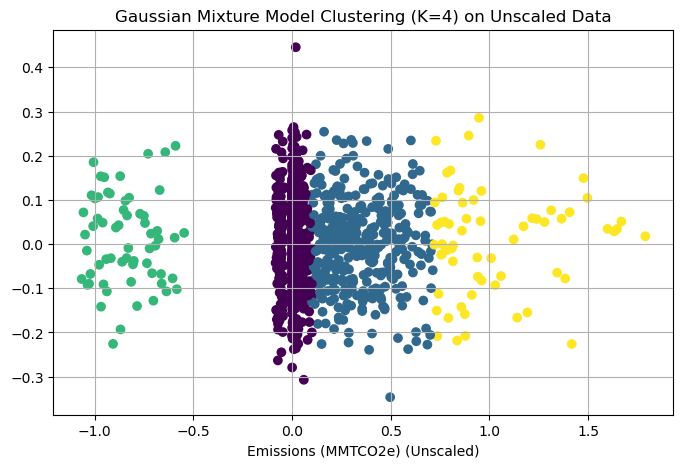

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler


# Fit Gaussian Mixture Model for different K values
bic = []  # Bayesian Information Criterion (BIC) to evaluate model
aic = []  # Akaike Information Criterion (AIC) to evaluate model
K_range = range(1, 10)  # Testing K from 1 to 10

for k in K_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_scaled)
    bic.append(gmm.bic(X_scaled))  # BIC for model evaluation
    aic.append(gmm.aic(X_scaled))  # AIC for model evaluation

# Plot BIC and AIC
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, bic, marker="o", linestyle="-", color="b")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("BIC")
plt.title("BIC for Different K Values")
plt.xticks(K_range)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(K_range, aic, marker="o", linestyle="-", color="r")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("AIC")
plt.title("AIC for Different K Values")
plt.xticks(K_range)
plt.grid()

plt.tight_layout()
plt.show()

# Use the optimal K based on BIC or AIC
optimal_k = np.argmin(bic) + 1  # Choose the K with minimum BIC

# Fit GMM with the optimal K
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Plot the results using the unscaled (original) data
plt.figure(figsize=(8, 5))
y_jitter = np.random.randn(len(final_df)) * 0.1  # Add some jitter to y-axis for visibility
plt.scatter(final_df["Emissions (MMTCO2e)"], y_jitter, c=gmm_labels, cmap='viridis', marker='o')
plt.xlabel("Emissions (MMTCO2e) (Unscaled)")
plt.title(f"Gaussian Mixture Model Clustering (K={optimal_k}) on Unscaled Data")
plt.grid(True)
plt.show()

In [45]:
optimal_k

4

In [46]:
final_df

,Sector - Reduction Level,Emissions (MMTCO2e),Cluster
0,Mobile Combustion - Automobile - Total Emissio...,1.028899,3
1,Mobile Combustion - Motorcycle - Total Emissio...,0.036643,2
2,Mobile Combustion - Trucks - Total Emissions (...,1.789613,3
3,Mobile Combustion - Buses - Total Emissions (M...,0.020234,2
4,Electricity Consumption - Residential Electric...,0.612048,0
...,...,...,...
1235,Agriculture & Land management - Manure fertili...,0.000004,2
1236,Wastewater treatment - Wastewater - Reduction 94%,0.004697,2
1237,Forestry - Deciduous forest - Reduction 94%,-1.066578,1
1238,Forestry - Coniferous forest - Reduction 94%,-0.083892,2
